# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [ ]:
pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data =[]
unit = "metric"
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&units="+ unit +"&q=" +  city

#    Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,"Lat": city_lat,
                          "Lng": city_lng, "Max Temp": city_max_temp,
                          "Humidity": city_humidity,"Cloudiness": city_clouds,
                          "Wind Speed": city_wind,"Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | la ronge
Processing Record 4 of Set 1 | enewetak
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | namibe
Processing Record 9 of Set 1 | wewak
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | ancud
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | berbera
Processing Record 16 of Set 1 | porbandar
Processing Record 17 of Set 1 | santa croce camerina
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | quellon
Processing Record 22 of Set 1 | imperatriz
Proces

Processing Record 44 of Set 4 | toga village
City not found. Skipping...
Processing Record 45 of Set 4 | haiku-pauwela
Processing Record 46 of Set 4 | bonthe
Processing Record 47 of Set 4 | new norfolk
Processing Record 48 of Set 4 | sretensk
Processing Record 49 of Set 4 | siwa oasis
Processing Record 50 of Set 4 | chisec
Processing Record 1 of Set 5 | punta gorda
Processing Record 2 of Set 5 | howrah
Processing Record 3 of Set 5 | nyurba
Processing Record 4 of Set 5 | queenstown
Processing Record 5 of Set 5 | zhetybay
City not found. Skipping...
Processing Record 6 of Set 5 | palikir - national government center
Processing Record 7 of Set 5 | arias
Processing Record 8 of Set 5 | corner brook
Processing Record 9 of Set 5 | anadyr
Processing Record 10 of Set 5 | tazovsky
Processing Record 11 of Set 5 | longboat key
Processing Record 12 of Set 5 | leava
Processing Record 13 of Set 5 | la passe
Processing Record 14 of Set 5 | atar
Processing Record 15 of Set 5 | kigoma
Processing Record 

Processing Record 38 of Set 8 | sur
Processing Record 39 of Set 8 | lucas
Processing Record 40 of Set 8 | onega
Processing Record 41 of Set 8 | worland
Processing Record 42 of Set 8 | mpulungu
Processing Record 43 of Set 8 | nogliki
Processing Record 44 of Set 8 | chinde
Processing Record 45 of Set 8 | huaidian
Processing Record 46 of Set 8 | amungan
Processing Record 47 of Set 8 | winchester
Processing Record 48 of Set 8 | olavarria
Processing Record 49 of Set 8 | horta
Processing Record 50 of Set 8 | same
Processing Record 1 of Set 9 | hadibu
Processing Record 2 of Set 9 | keningau
Processing Record 3 of Set 9 | bundaberg north
Processing Record 4 of Set 9 | medicine hat
Processing Record 5 of Set 9 | mount pearl
Processing Record 6 of Set 9 | val-d'or
Processing Record 7 of Set 9 | macusani
Processing Record 8 of Set 9 | umba
Processing Record 9 of Set 9 | sant antoni de portmany
Processing Record 10 of Set 9 | sandnessjoen
Processing Record 11 of Set 9 | zambezi
Processing Record 1

Processing Record 33 of Set 12 | the dalles
Processing Record 34 of Set 12 | kalmunai
Processing Record 35 of Set 12 | bengkulu
Processing Record 36 of Set 12 | merizo village
Processing Record 37 of Set 12 | codrington
Processing Record 38 of Set 12 | weining
Processing Record 39 of Set 12 | kapuskasing
Processing Record 40 of Set 12 | kalianget
Processing Record 41 of Set 12 | prineville
Processing Record 42 of Set 12 | chaohu
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
#view city data
print(city_data)

[{'City': 'puerto natales', 'Lat': -51.7236, 'Lng': -72.4875, 'Max Temp': -0.2, 'Humidity': 80, 'Cloudiness': 68, 'Wind Speed': 2.37, 'Country': 'CL', 'Date': 1698548307}, {'City': 'lebu', 'Lat': -37.6167, 'Lng': -73.65, 'Max Temp': 9.44, 'Humidity': 70, 'Cloudiness': 69, 'Wind Speed': 6.44, 'Country': 'CL', 'Date': 1698548307}, {'City': 'la ronge', 'Lat': 55.1001, 'Lng': -105.2842, 'Max Temp': -4.86, 'Humidity': 80, 'Cloudiness': 75, 'Wind Speed': 3.09, 'Country': 'CA', 'Date': 1698548307}, {'City': 'enewetak', 'Lat': 11.3474, 'Lng': 162.3373, 'Max Temp': 28.74, 'Humidity': 74, 'Cloudiness': 77, 'Wind Speed': 4.64, 'Country': 'MH', 'Date': 1698548307}, {'City': 'grytviken', 'Lat': -54.2811, 'Lng': -36.5092, 'Max Temp': 1.4, 'Humidity': 84, 'Cloudiness': 28, 'Wind Speed': 6.01, 'Country': 'GS', 'Date': 1698548307}, {'City': 'edinburgh of the seven seas', 'Lat': -37.0676, 'Lng': -12.3116, 'Max Temp': 11.55, 'Humidity': 70, 'Cloudiness': 53, 'Wind Speed': 11.03, 'Country': 'SH', 'Date': 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,-0.20,80,68,2.37,CL,1698548307
1,lebu,-37.6167,-73.6500,9.44,70,69,6.44,CL,1698548307
2,la ronge,55.1001,-105.2842,-4.86,80,75,3.09,CA,1698548307
3,enewetak,11.3474,162.3373,28.74,74,77,4.64,MH,1698548307
4,grytviken,-54.2811,-36.5092,1.40,84,28,6.01,GS,1698548307


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-0.20,80,68,2.37,CL,1698548307
1,lebu,-37.6167,-73.6500,9.44,70,69,6.44,CL,1698548307
2,la ronge,55.1001,-105.2842,-4.86,80,75,3.09,CA,1698548307
3,enewetak,11.3474,162.3373,28.74,74,77,4.64,MH,1698548307
4,grytviken,-54.2811,-36.5092,1.40,84,28,6.01,GS,1698548307


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

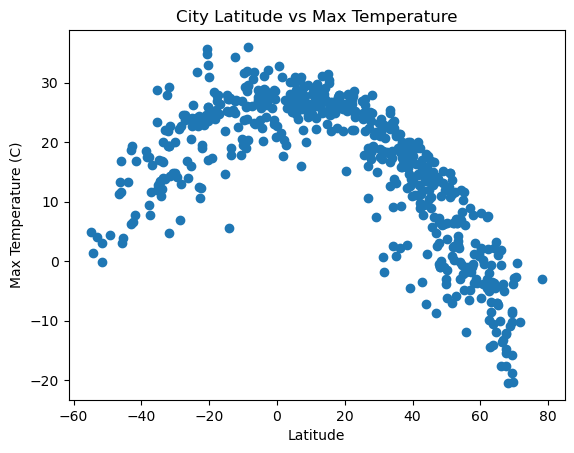

In [10]:
# Build scatter plot for latitude vs. temperature
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

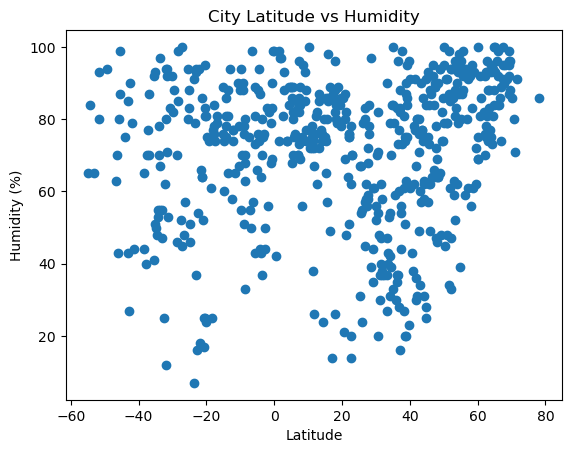

In [11]:
# Build the scatter plots for latitude vs. humidity
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Humidity"]
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

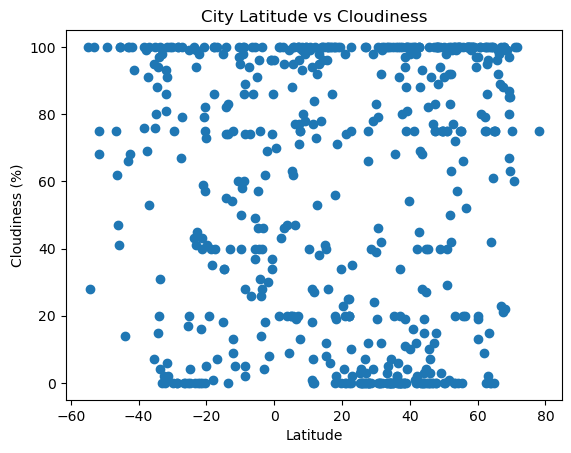

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

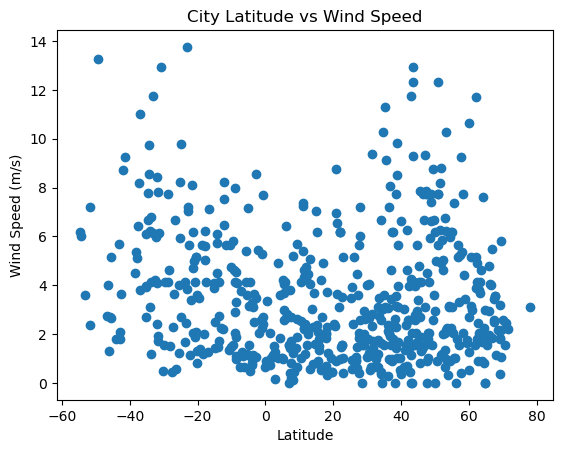

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values=slope*x_values+intercept
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    line_eq="y = " + str(round(slope,3)) + "x +" + str(round(intercept,3))
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()



In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,la ronge,55.1001,-105.2842,-4.86,80,75,3.09,CA,1698548307
3,enewetak,11.3474,162.3373,28.74,74,77,4.64,MH,1698548307
6,whitehorse,60.7161,-135.0538,-3.83,92,100,5.14,CA,1698548226
9,bethel,41.3712,-73.4140,18.93,62,75,1.54,US,1698548308
12,isafjordur,66.0755,-23.1240,1.83,84,92,1.97,IS,1698548308


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-0.20,80,68,2.37,CL,1698548307
1,lebu,-37.6167,-73.6500,9.44,70,69,6.44,CL,1698548307
4,grytviken,-54.2811,-36.5092,1.40,84,28,6.01,GS,1698548307
5,edinburgh of the seven seas,-37.0676,-12.3116,11.55,70,53,11.03,SH,1698548308
7,namibe,-15.1961,12.1522,21.93,76,18,3.90,AO,1698548308


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7786304961633674


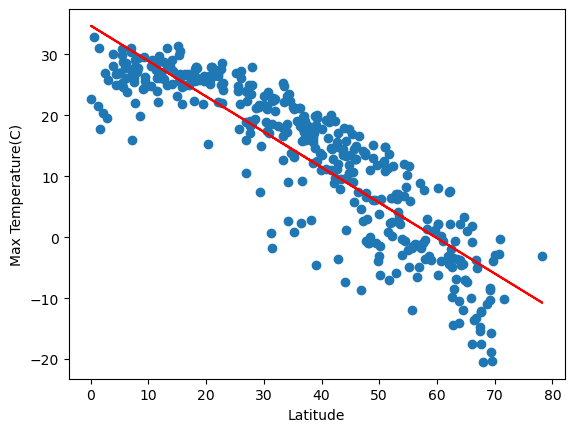

In [17]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
plt.ylabel("Max Temperature(C)")
plot_linear_regression(x_values, y_values,"Max Temp", (43,40))


The r-squared is: 0.524019917352594


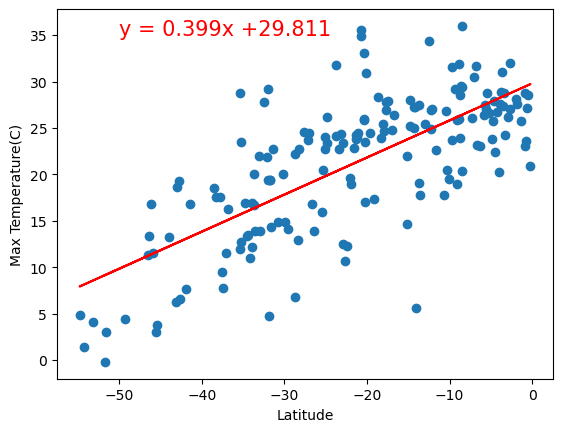

In [18]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
plt.ylabel("Max Temperature(C)")
plot_linear_regression(x_values, y_values,"Max Temp", (-50,35))

**Discussion about the linear relationship:** There is a positive correlation(Positive slope) between the Latitude and Maximum temperature in the Southern Hemisphere compared to a negative association(negative slope) in the Northern Hemisphere. In other words, as you move away from the equator, the temperature tends to decrease. It seems like temperatures are typically warmer approaching the equator and cooler towards the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.027420069531600495


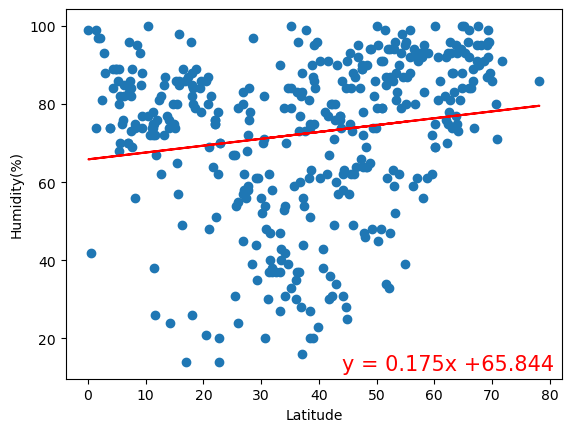

In [19]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
plt.ylabel("Humidity(%)")
plot_linear_regression(x_values, y_values, "Humidity", (44,12))


The r-squared is: 0.002603010532006907


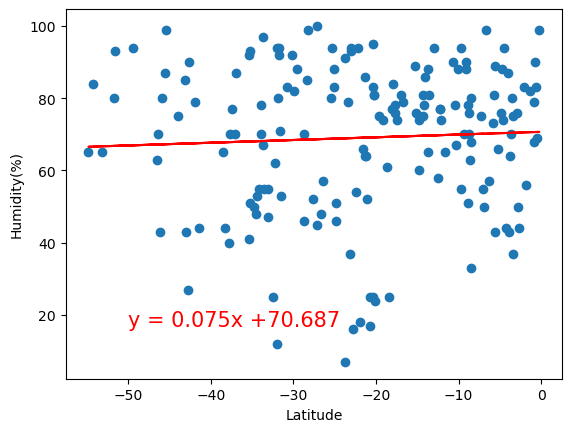

In [20]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
plt.ylabel("Humidity(%)")
plot_linear_regression(x_values, y_values, "Humidity", (-50,17))

**Discussion about the linear relationship:** From the data for both hemisphere, it seems like there is no or very minimal correlation between Latitude and humidity (r-squared is very close to 0).

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.012966845207177665


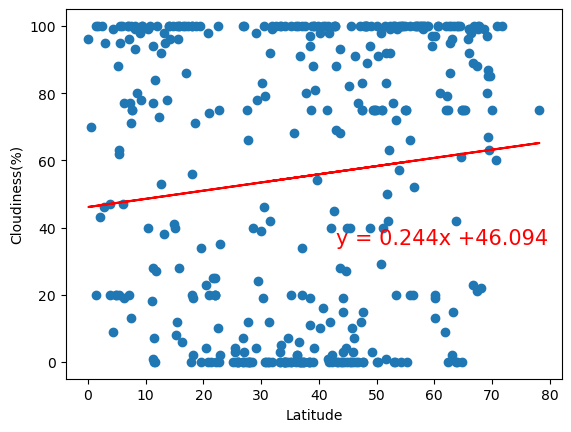

In [21]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness(%)")
plot_linear_regression(x_values, y_values, "Cloudiness", (43,35))

The r-squared is: 0.017606937586303557


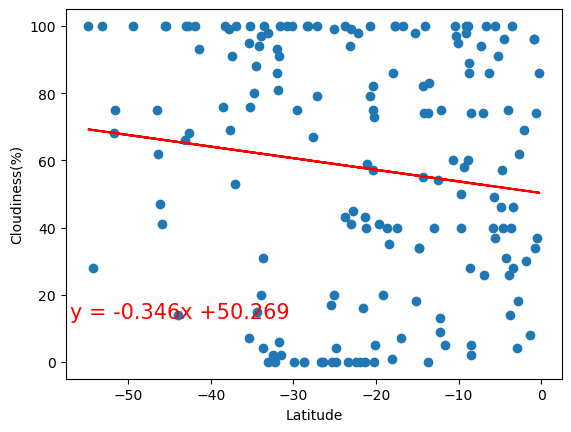

In [22]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness(%)")
plot_linear_regression(x_values, y_values, "Cloudiness", (-57,13))

**Discussion about the linear relationship:** No correlation between Latitude and cloudiness for both the northern and southern hemisphere as seen from the r-square value of about 0.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.021448994334855566


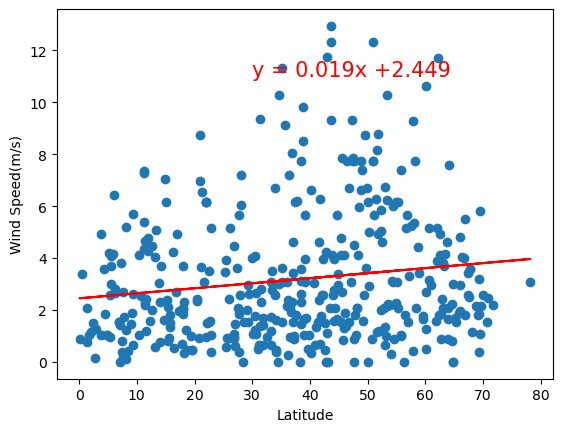

In [23]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed(m/s)")
plot_linear_regression(x_values, y_values, "Wind Speed", (30,11))

The r-squared is: 0.08142219323084475


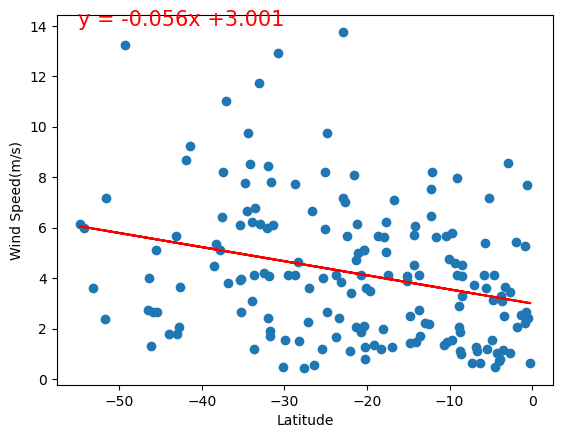

In [24]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed(m/s)")
plot_linear_regression(x_values, y_values, "Wind Speed", (-55,14))

**Discussion about the linear relationship:** No correlation between Latitude and wind speed for both the northern and southern hemisphere as seen from the r-square value of about 0.